<h1 style="color:#f25f5c; font-weight:bold">Sales Forecasting and Demand Prediction </h1>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<h2 style="color:#247BA0; font-weight:bold">Milestone 1: Data Collection, Exploration, and Preprocessing</h2>


<h3 style="color:#70C1B3; font-weight:bold">Data Reading</h3>


In [309]:
data = pd.read_excel('global_superstore_2016.xlsx')
data.head()


Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816  Technology       Phones   
1  ...  FUR-CH-5379   Furniture       Chairs   
2  ...  TEC-PH-5356  Technology       Phones   
3  ...  TEC-PH-5267  Technology       Phones   
4  ...  TEC-CO-6011  Technology      Copiers   

                                Product Name     Sales Quantity Discount  \
0                           Samsung Convoy 3   221.980        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.395        9      0.1   
2          Nokia Smart Phone, with Caller ID  5175.171        9      0.1   
3             Motorola Smart Phone, Cordless  2892.510        5      0.1   
4             Sharp Wireless Fax, High-Speed  2832.960        8      0.0   

     Profit  Shipping Cost  Order Priority  
0   62.1544          40.77            High  
1 -288.7650         923.63        Critical  
2  919.9710         915.49          Medium  
3  -96.5400         910.16          Medium  
4  311.5200         903.04        Critical  

[5 rows x 24 columns]

In [310]:
data.shape

(51290, 24)

In [311]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [313]:
data.describe()

Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2014-05-11 21:26:49.155780608   
min        1.00000            2012-01-01 00:00:00   
25%    12823.25000            2013-06-19 00:00:00   
50%    25645.50000            2014-07-08 00:00:00   
75%    38467.75000            2015-05-22 00:00:00   
max    51290.00000            2015-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2014-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2012-01-03 00:00:00   1040.000000      0.444000   
25%              2013-06-23 00:00:00  23223.000000     30.758625   
50%              2014-07-12 00:00:00  56430.500000     85.053000   
75%              2015-05-26 00:00:00  90008.000000    251.053200   
max              2016-01-07 00:00:00  99301.000000  22638.480000   
std                              NaN  32063.693350    487.565361   

           Quantity      Discount        Profit  Shipping Cost  
count  51290.000000  51290.000000  51290.000000   51290.000000  
mean       3.476545      0.142908     28.610982      26.478567  
min        1.000000      0.000000  -6599.978000       1.002000  
25%        2.000000      0.000000      0.000000       2.610000  
50%        3.000000      0.000000      9.240000       7.790000  
75%        5.000000      0.200000     36.810000      24.450000  
max       14.000000      0.850000   8399.976000     933.570000  
std        2.278766      0.212280    174.340972      57.251373

<h3 style="color:#70C1B3; font-weight:bold">Preprocessing and Feature Engineering</h3>


<h4 style="color:#FFE066; font-weight:bold">Handling Nulls</h4>


In [314]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [315]:
data.drop(["Postal Code"], axis=1, inplace=True)
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<h4 style="color:#FFE066; font-weight:bold">Handling Outliers</h4>


In [316]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")


Outliers in Row ID: 0
Outliers in Sales: 5655
Outliers in Quantity: 877
Outliers in Discount: 4172
Outliers in Profit: 9755
Outliers in Shipping Cost: 5909


In [317]:

for col in numerical_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    data[col] = data[col].clip(lower=low, upper=up)


In [318]:
# Detect outliers using the IQR method for numerical columns in Training data
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")


Outliers in Row ID: 0
Outliers in Sales: 0
Outliers in Quantity: 0
Outliers in Discount: 0
Outliers in Profit: 0
Outliers in Shipping Cost: 0


<h4 style="color:#FFE066; font-weight:bold">Handling Duplicates</h4>


In [319]:
# Number of Duplicated Rows
data.duplicated().sum()

np.int64(0)

<h4 style="color:#FFE066; font-weight:bold">Extracting Year, Month, Day, Economic Indicators</h4>


In [320]:
if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'])

    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Weekday'] = data['Order Date'].dt.day_name()
    data['IsWeekend'] = data['Weekday'].isin(['Saturday', 'Sunday'])

In [321]:
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                           'Spring' if x in [3, 4, 5] else
                                           'Summer' if x in [6, 7, 8] else
                                           'Fall')

In [322]:
data[['Order Date', 'Year', 'Month', 'Weekday', 'IsWeekend', 'Season']].head()

Order Date  Year  Month    Weekday  IsWeekend  Season
0 2014-11-11  2014     11    Tuesday      False    Fall
1 2014-02-05  2014      2  Wednesday      False  Winter
2 2014-10-17  2014     10     Friday      False    Fall
3 2014-01-28  2014      1    Tuesday      False  Winter
4 2014-11-05  2014     11  Wednesday      False    Fall

<h4 style="color:#FFE066; font-weight:bold">Extracting Promotion Flag, DiscountCategory</h4>


In [323]:

data['PromotionFlag'] = data['Discount'].apply(lambda x: 1 if x > 0 else 0)
data['DiscountCategory'] = pd.cut(
    data['Discount'],
    bins=[-1, 0, 5, 15, 100],
    labels=['No Discount', 'Low', 'Medium', 'High']
)


In [324]:
data[['Discount', 'PromotionFlag', 'DiscountCategory']].head()

Discount  PromotionFlag DiscountCategory
0       0.0              0      No Discount
1       0.1              1              Low
2       0.1              1              Low
3       0.1              1              Low
4       0.0              0      No Discount

<h3 style="color:#70C1B3; font-weight:bold">Data Exploration</h3>


<h4 style="color:#FFE066; font-weight:bold">Understanding Data</h4>


<h5>
Sales → Total revenue from a sale.<br>
Quantity → Number of units sold.<br>
Profit → Revenue after costs (useful for profit margin analysis).<br>
SalesGrowth → Growth rate of sales over time (useful for trend analysis).<br>
SalesCategory → Categorized sales values (e.g., High, Medium, Low).<br>
Discount → The percentage or amount of discount applied.<br>
DiscountEffect → Impact of discount on sales (e.g., increased volume, reduced profit).<br>
DiscountCategory → Categorization of discount levels (e.g., Low, Medium, High).<br>
PromotionFlag → Whether a promotion was applied (1 = Yes, 0 = No).<br>
Weekday, IsWeekend → Check if sales peak on weekends or weekdays.<br>
Segment → (e.g., Consumer, Corporate, Home Office) → Check which segment spends the most.
</h5>


<h4 style="color:#FFE066; font-weight:bold">Feature understanding</h4>


<h5 style="font-weight:bold">The number of orders from each segment</h5>

In [325]:
data["Segment"].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

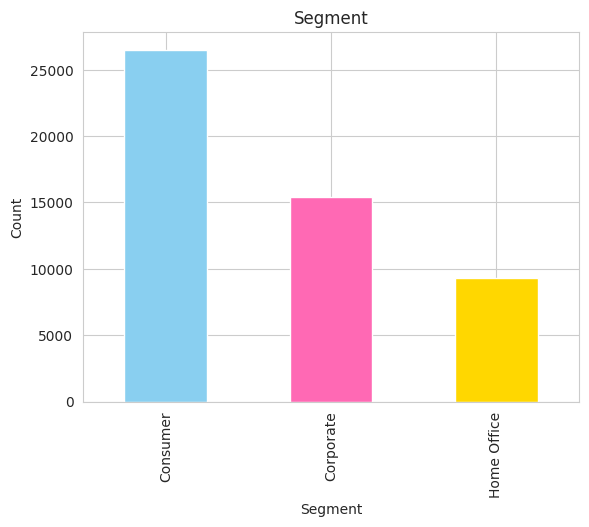

In [326]:
data["Segment"].value_counts().plot(kind="bar", color=colors)
plt.title("Segment")
plt.ylabel("Count")
plt.show()

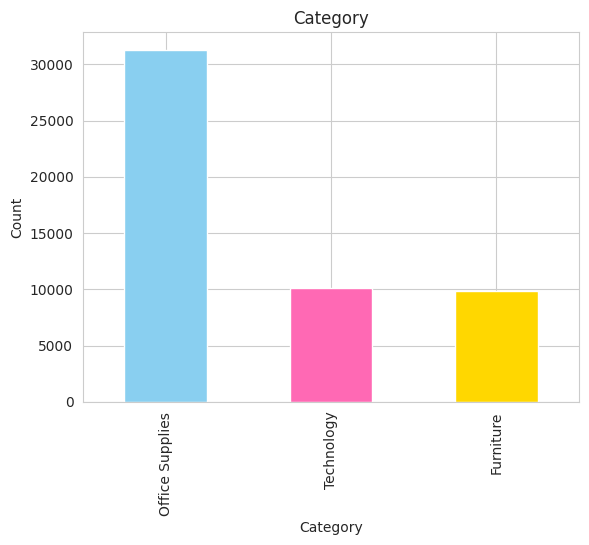

In [327]:
data["Category"].value_counts().plot(kind="bar", color=colors)
plt.title("Category")
plt.ylabel("Count")
plt.show()

<h5>The number of orders for sub_category</h5>

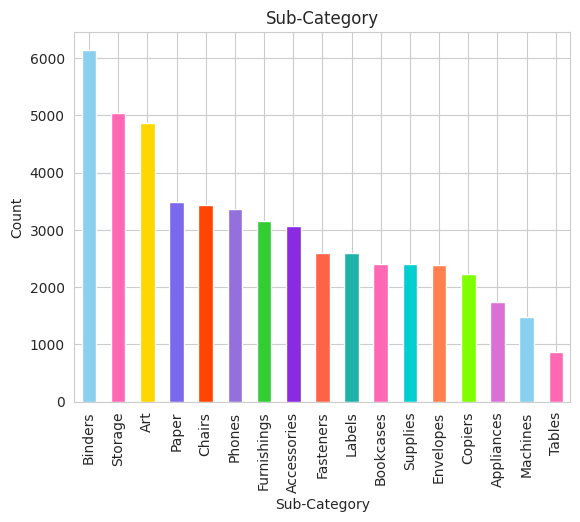

In [328]:
data["Sub-Category"].value_counts().plot(kind="bar", color=colors)
plt.title("Sub-Category")
plt.ylabel("Count")
plt.show()

Sales **Trends**

<Axes: xlabel='Month'>

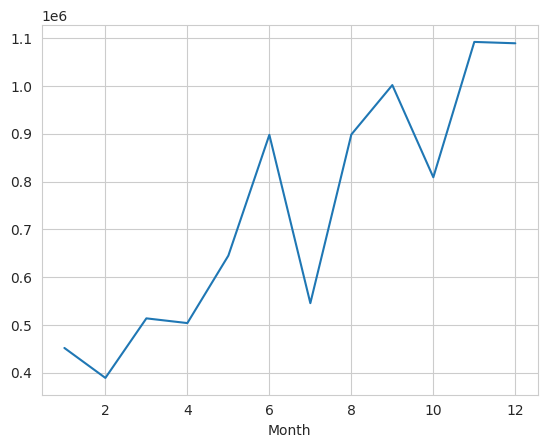

In [329]:
data.groupby("Month")["Sales"].sum().plot(kind="line")

<Axes: xlabel='Season'>

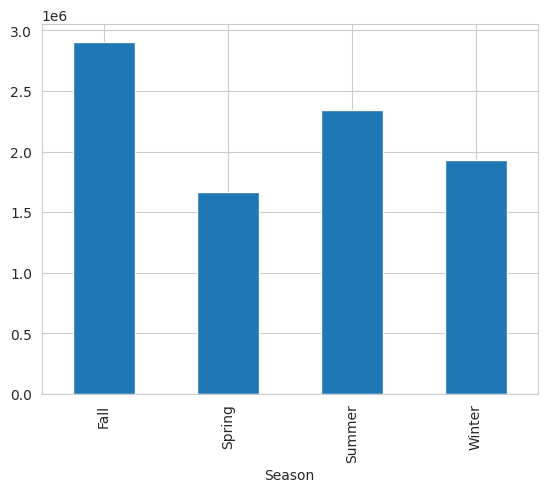

In [330]:
data.groupby("Season")["Sales"].sum().plot(kind="bar")

In [331]:
data.groupby("Season")["Sales"].sum().sort_values(ascending=False)

Season
Fall      2.903499e+06
Summer    2.342389e+06
Winter    1.930987e+06
Spring    1.663426e+06
Name: Sales, dtype: float64

**Top Products and Categories**

In [332]:
data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

Sub-Category
Phones         1.043545e+06
Chairs         1.041158e+06
Storage        9.507584e+05
Bookcases      9.476614e+05
Copiers        9.355231e+05
Accessories    6.121421e+05
Appliances     5.345759e+05
Machines       4.868120e+05
Tables         3.943721e+05
Furnishings    3.712760e+05
Art            3.705978e+05
Binders        3.653895e+05
Paper          2.413854e+05
Supplies       2.133185e+05
Envelopes      1.691943e+05
Fasteners      8.949505e+04
Labels         7.309760e+04
Name: Sales, dtype: float64

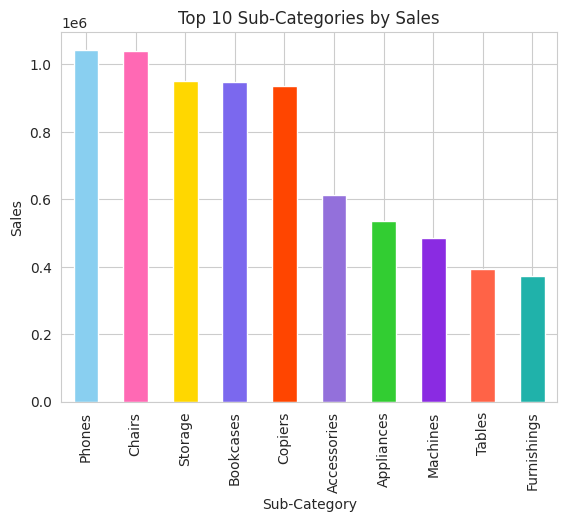

In [333]:
data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10).plot(kind="bar",color=colors)
plt.ylabel("Sales")
plt.title("Top 10 Sub-Categories by Sales")
plt.show()

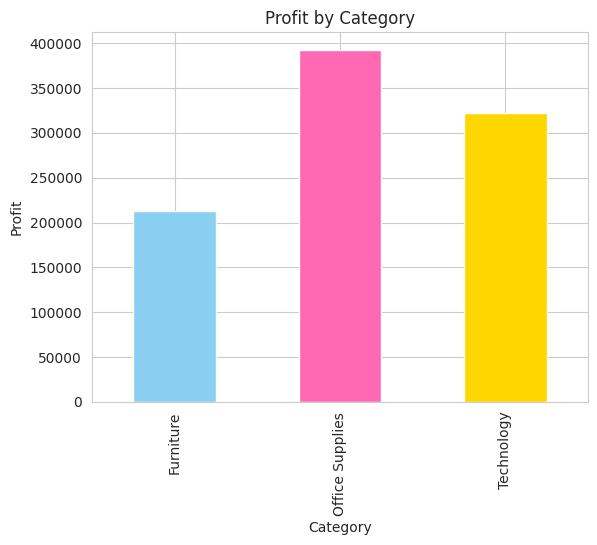

In [334]:
data.groupby('Category')['Profit'].sum().plot(kind='bar',color=colors)
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.show()

**The 10 customers with the highest number of orders.**

In [335]:
data['Customer ID'].value_counts().head(10)

Customer ID
SV-203651406    26
WB-218501404    24
AP-109151404    23
EM-1396082      21
CS-121757       20
JK-1609027      19
RW-195401404    19
TB-210551406    18
RB-1933082      18
YC-2189545      18
Name: count, dtype: int64

**The sales in weekend**

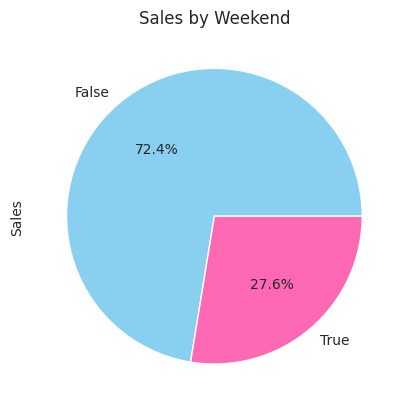

In [336]:
data.groupby('IsWeekend')['Sales'].sum().plot(kind="pie",colors=colors,autopct='%1.1f%%')
plt.title('Sales by Weekend')
plt.show()

<h3 style="color:#70C1B3; font-weight:bold">Exploratory Data Analysis (EDA)</h3>


<h4 style="color:#FFE066; font-weight:bold">Pie Chart → Distribution of Ship Mode</h4>


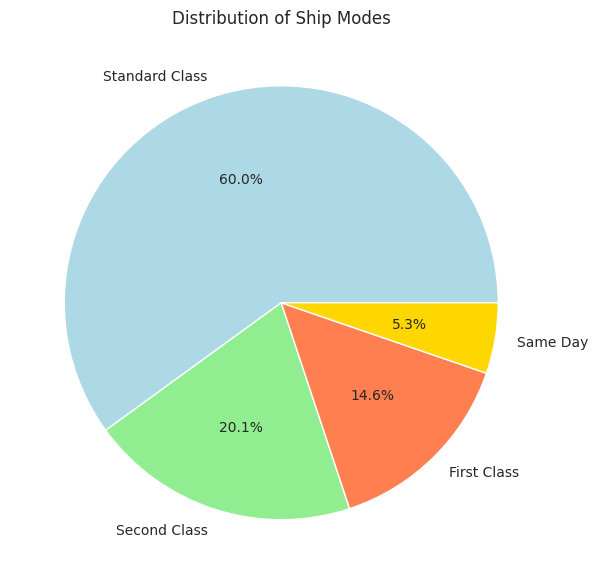

In [337]:
plt.figure(figsize=(7, 12))
data["Ship Mode"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightgreen", "coral", "gold"])
plt.title("Distribution of Ship Modes")
plt.ylabel("")  # Hide y-label
plt.show()


<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Total Sales by Category</h4>


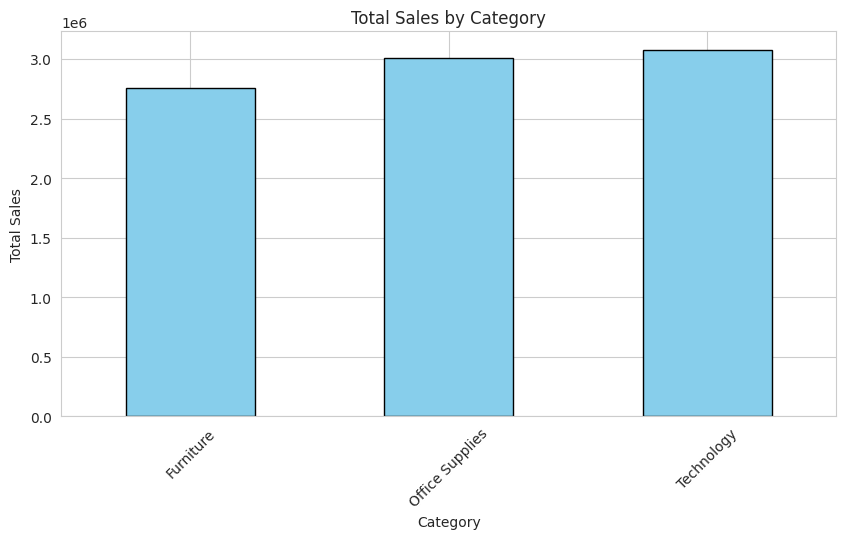

In [338]:
plt.figure(figsize=(10, 5))
data.groupby("Category")["Sales"].sum().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Horizontal Bar Chart → Profit per Region</h4>


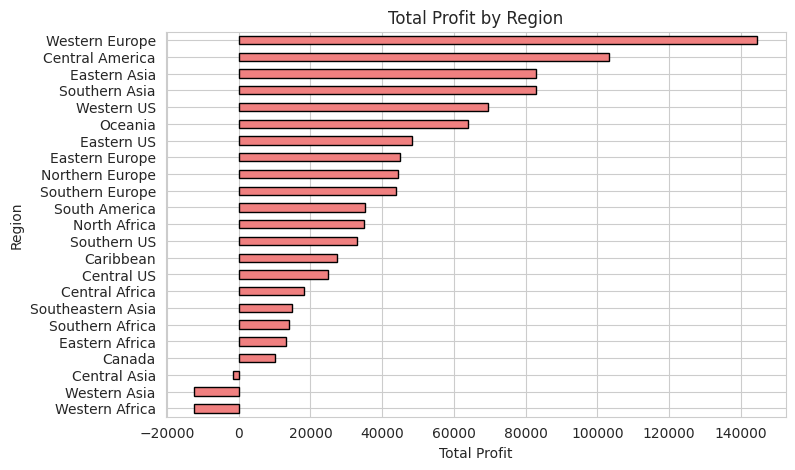

In [339]:
plt.figure(figsize=(8, 5))
data.groupby("Region")["Profit"].sum().sort_values().plot(kind="barh", color="lightcoral", edgecolor="black")
plt.title("Total Profit by Region")
plt.xlabel("Total Profit")
plt.ylabel("Region")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Correlation Heatmap → Relationships between Numerical Variables</h4>


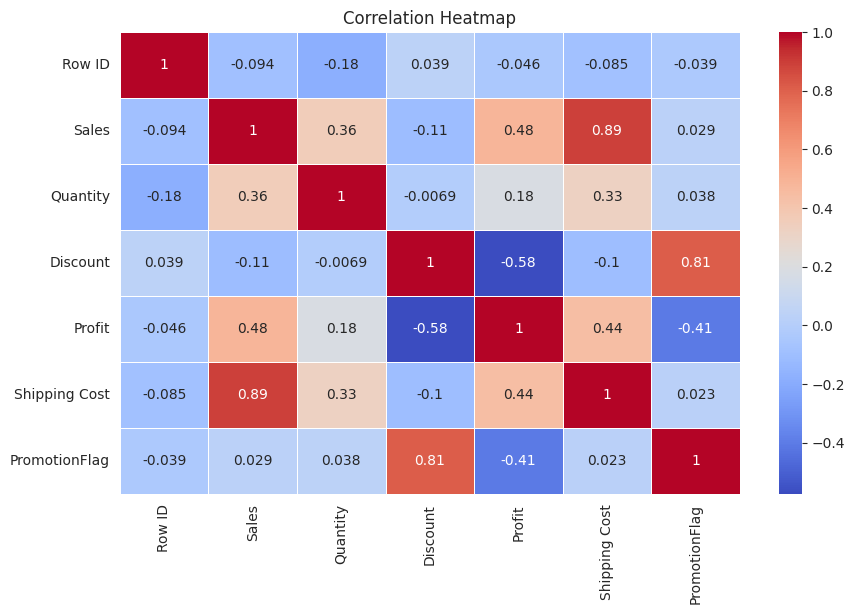

In [340]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Shows if higher sales lead to higher profit</h4>


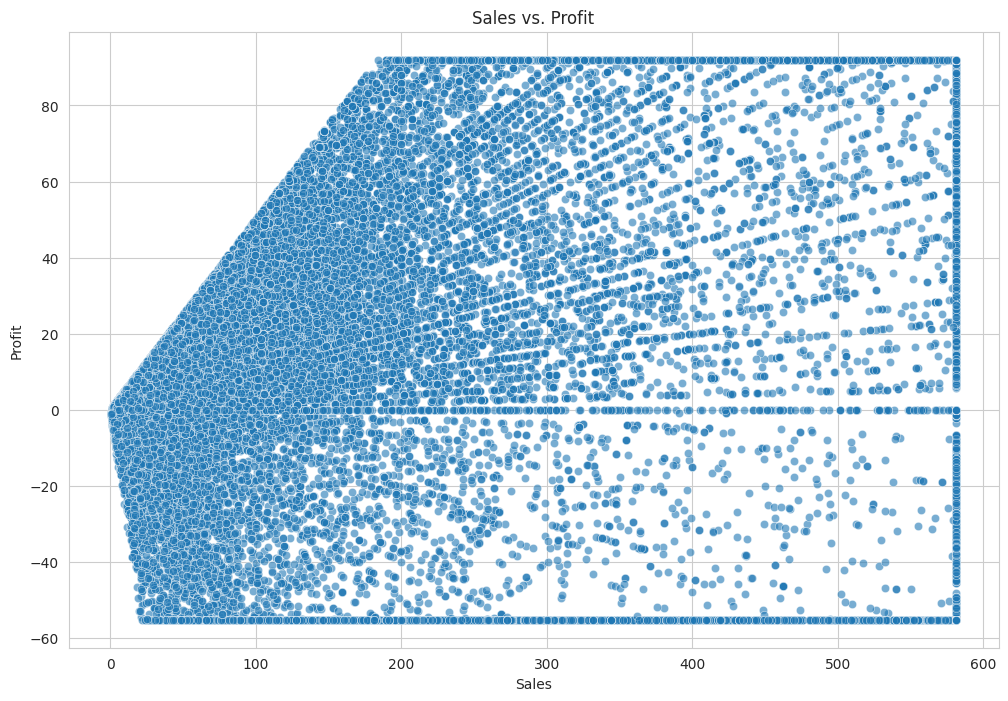

In [341]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Sales'], y=data['Profit'], alpha=0.6)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs. Profit")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compares total sales across product categories</h4>


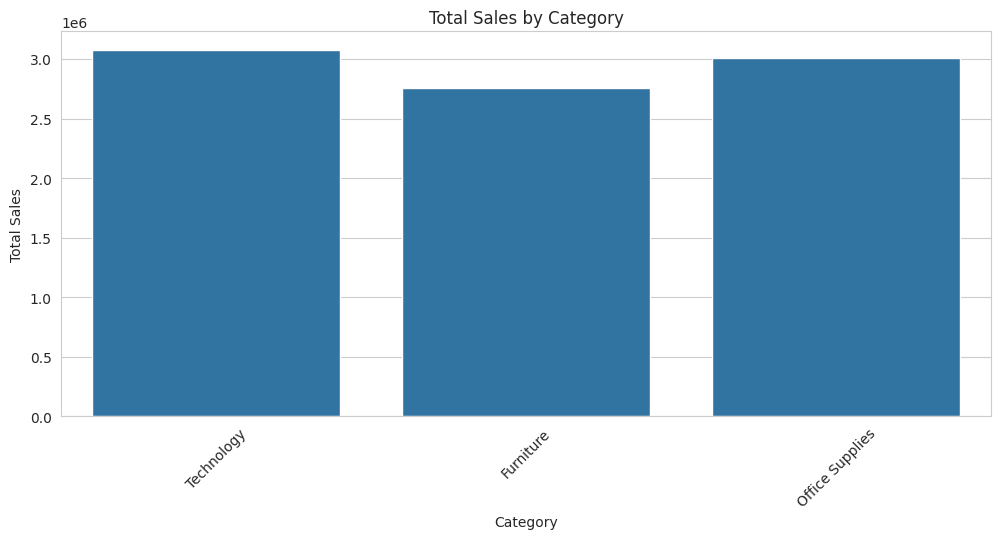

In [342]:
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Category'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Checks how discounts impact profit</h4>


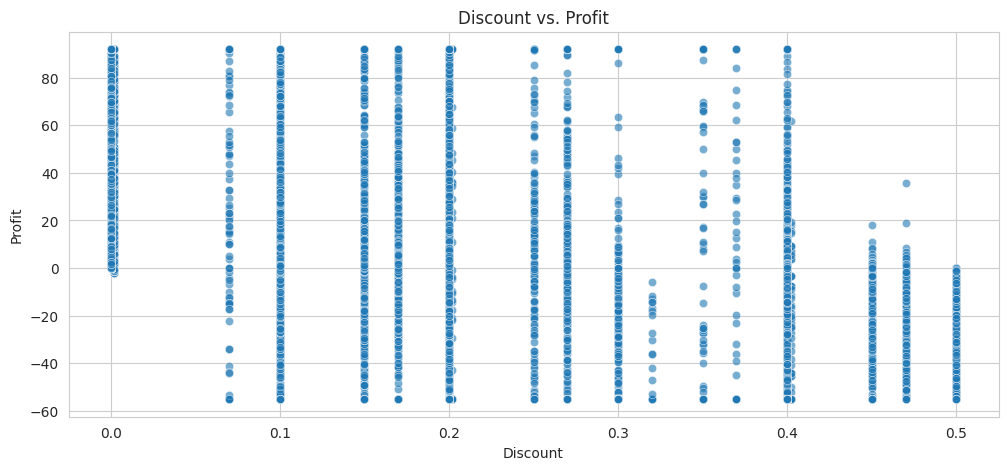

In [343]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data['Discount'], y=data['Profit'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs. Profit")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Box Plot → Displays seasonal sales variations</h4>


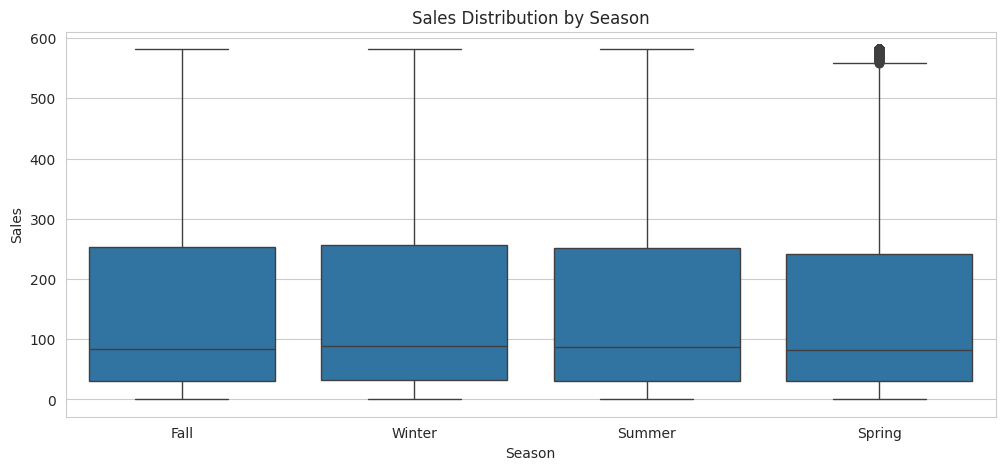

In [344]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Season'], y=data['Sales'])
plt.xlabel("Season")
plt.ylabel("Sales")
plt.title("Sales Distribution by Season")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compares total sales across different shipping modes</h4>


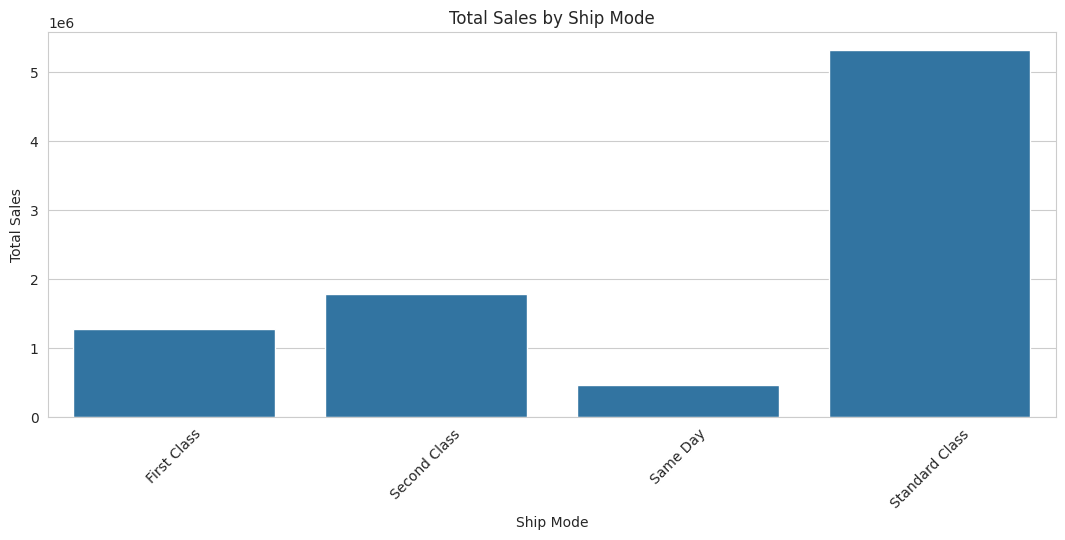

In [345]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Ship Mode'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.title("Total Sales by Ship Mode")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Analyzes the relationship between quantity sold and sales</h4>


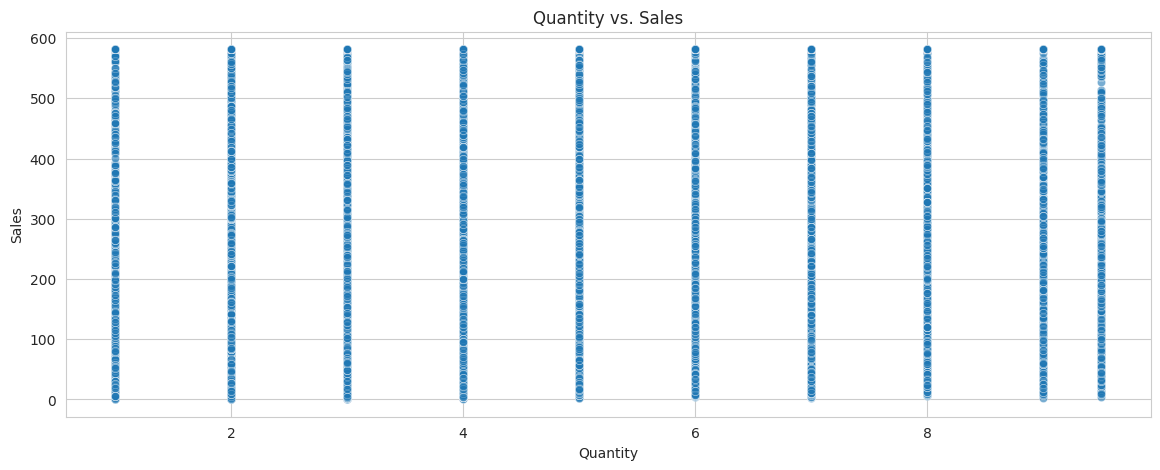

In [346]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x=data['Quantity'], y=data['Sales'], alpha=0.6)
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity vs. Sales")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compare profitability across product categories</h4>


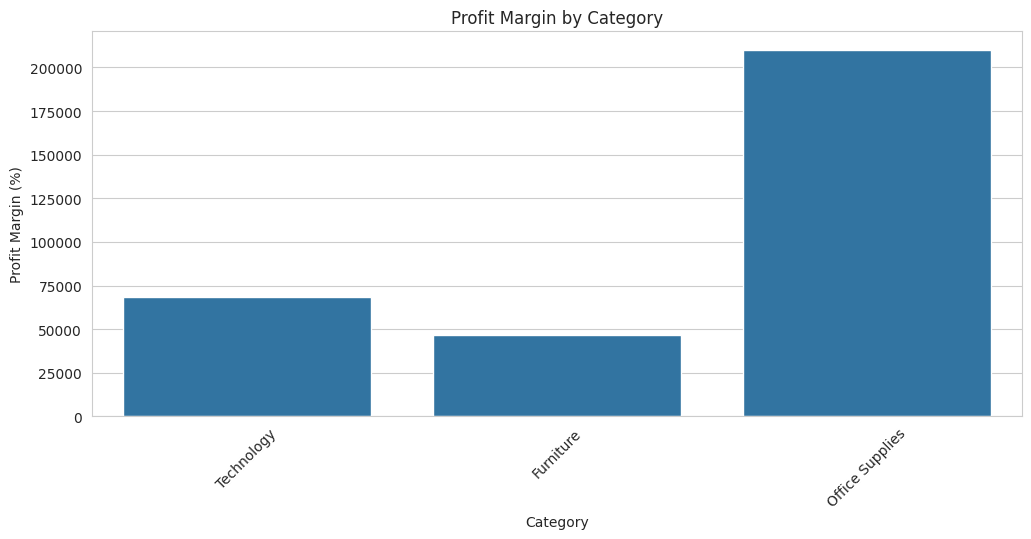

In [347]:
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Category'], y=data['Profit Margin'], estimator=sum, ci=None)
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin by Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Identify which customer segment contributes the most to sales</h4>


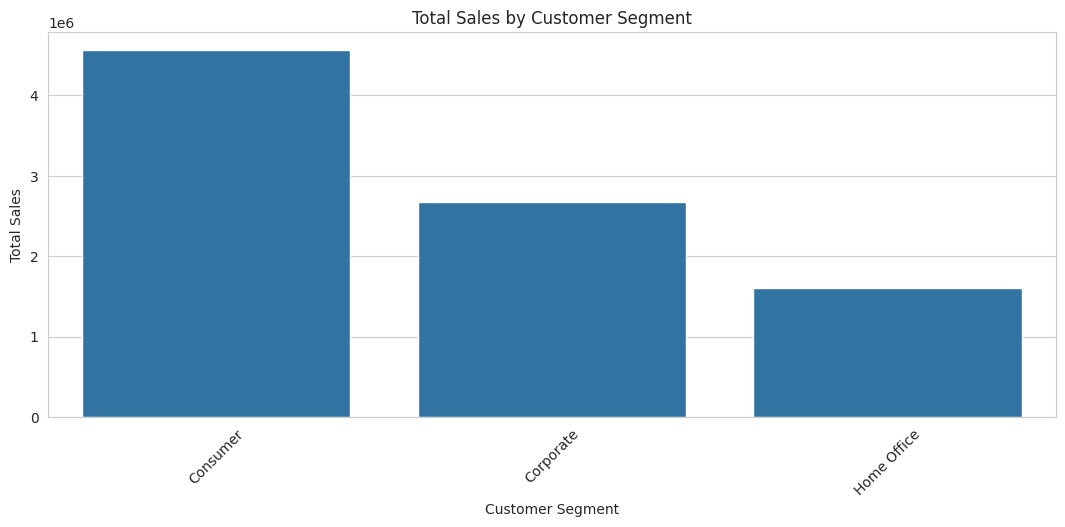

In [348]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Segment'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → See how discounts impact total sales</h4>


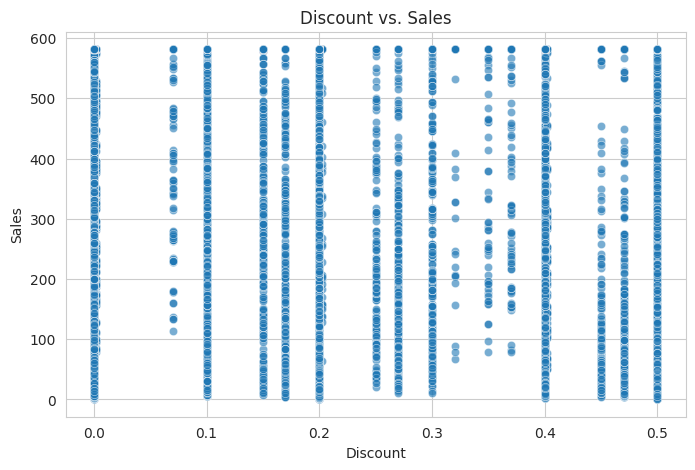

In [349]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Discount'], y=data['Sales'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Discount vs. Sales")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compare regional profitability</h4>


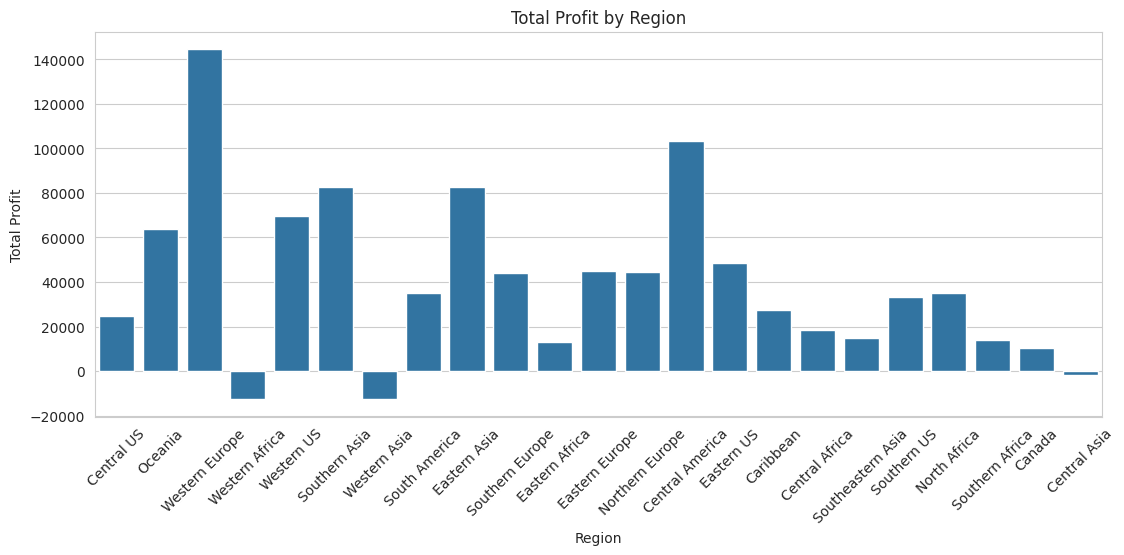

In [350]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Region'], y=data['Profit'], estimator=sum, ci=None)
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Total Profit by Region")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Histogram → Understand the frequency of order sizes</h4>


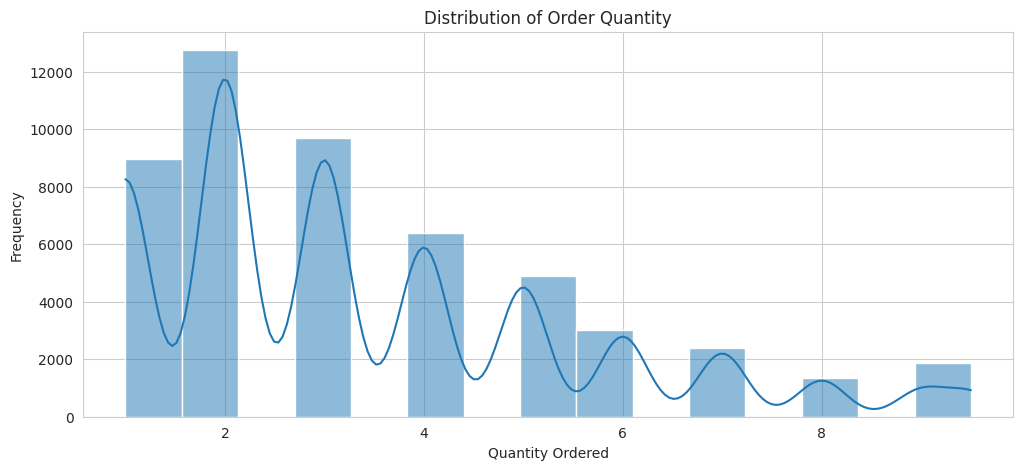

In [351]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Quantity'], bins=15, kde=True)
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.title("Distribution of Order Quantity")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Determine if higher shipping costs relate to higher sales</h4>


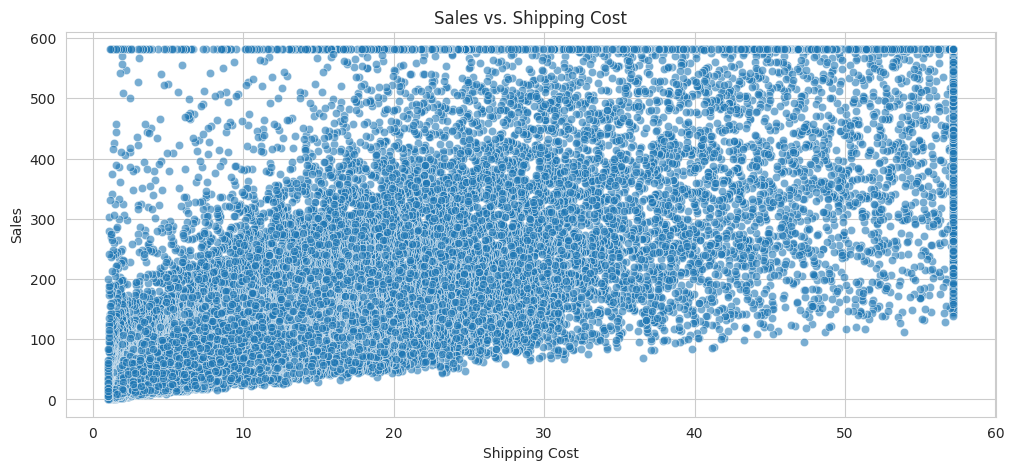

In [352]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data['Shipping Cost'], y=data['Sales'], alpha=0.6)
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.title("Sales vs. Shipping Cost")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Identify the most valuable customers</h4>


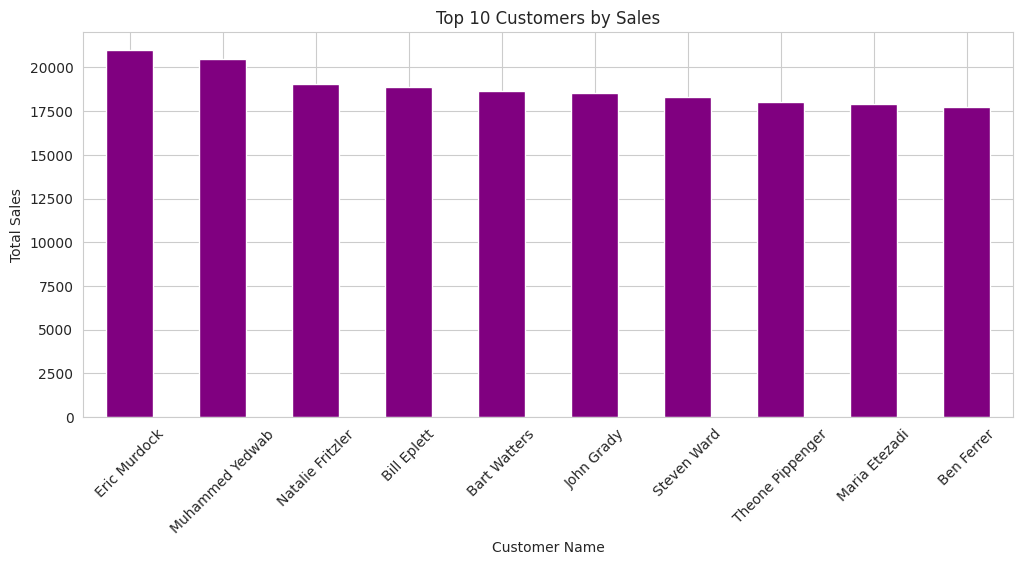

In [353]:
top_customers = data.groupby('Customer Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 5))
top_customers.plot(kind="bar", color="purple")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Pie Chart → If payment mode data exists, compare payment preferences</h4>


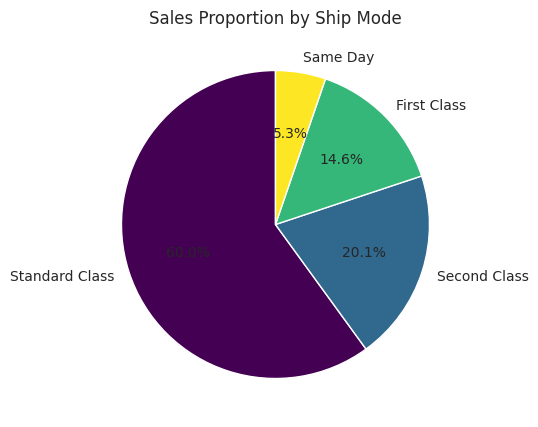

In [354]:
plt.figure(figsize=(12, 5))
data['Ship Mode'].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.ylabel("")
plt.title("Sales Proportion by Ship Mode")
plt.show()

<h2 style="color:#247BA0; font-weight:bold">Milestone 2: Advanced Data Analysis and Feature Engineering </h2>


<h3 style="color:#70C1B3; font-weight:bold">Advanced Data Analysis</h3>


In [355]:
data_sales = data.groupby("Order Date")["Sales"].sum().reset_index()
data_sales.set_index("Order Date", inplace=True)
data_sales

Sales
Order Date              
2012-01-01    808.563000
2012-01-02    314.220000
2012-01-03   3814.236388
2012-01-04   1741.925303
2012-01-05   1215.005062
...                  ...
2015-12-27  10492.234260
2015-12-28   1647.174000
2015-12-29  20221.677030
2015-12-30  13104.827612
2015-12-31  10924.920775

[1430 rows x 1 columns]

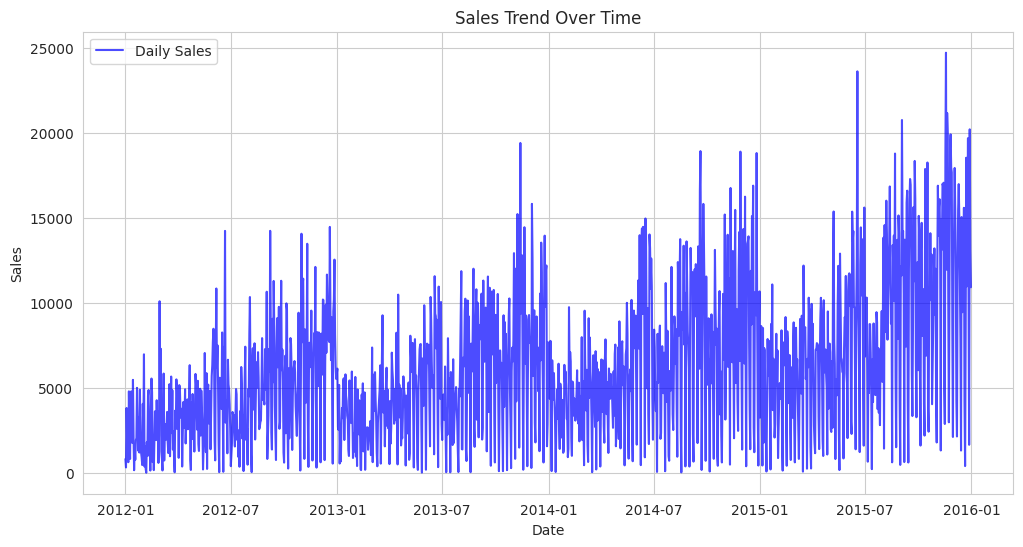

In [356]:
plt.figure(figsize=(12, 6))
plt.plot(data_sales, label="Daily Sales", color="blue", alpha=0.7)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.savefig("sales_trend.png")

plt.show()

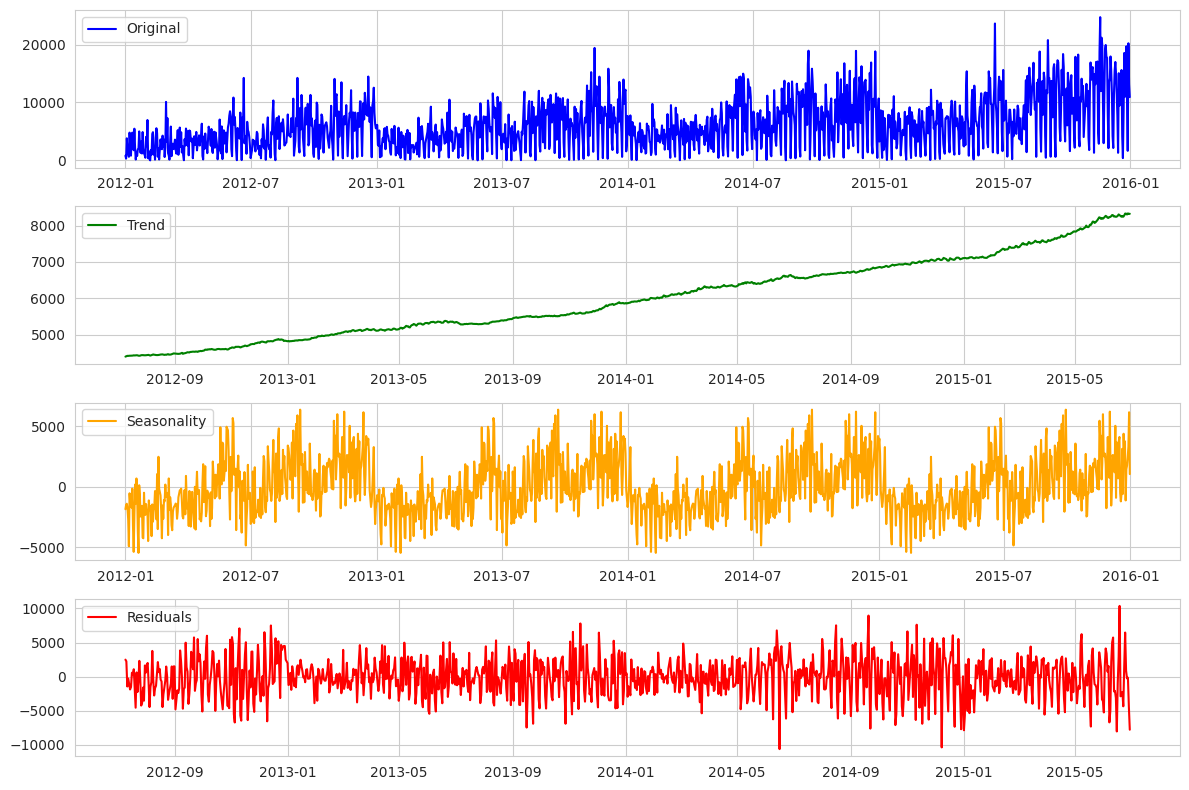

In [357]:
decomposition = seasonal_decompose(data_sales, model="additive", period=365)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data_sales, label="Original", color="blue")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals", color="red")
plt.legend()
plt.tight_layout()
plt.savefig("decomposition.png", dpi=300, bbox_inches='tight')

plt.show()

In [358]:
adf_test = adfuller(data_sales["Sales"])
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
print("ADF Test Results:", adf_results)

ADF Test Results: {'ADF Statistic': np.float64(-2.923162836224649), 'p-value': np.float64(0.04272001729157975), 'Critical Values': {'1%': np.float64(-3.435002884902567), '5%': np.float64(-2.8635949199569324), '10%': np.float64(-2.56786403055995)}}


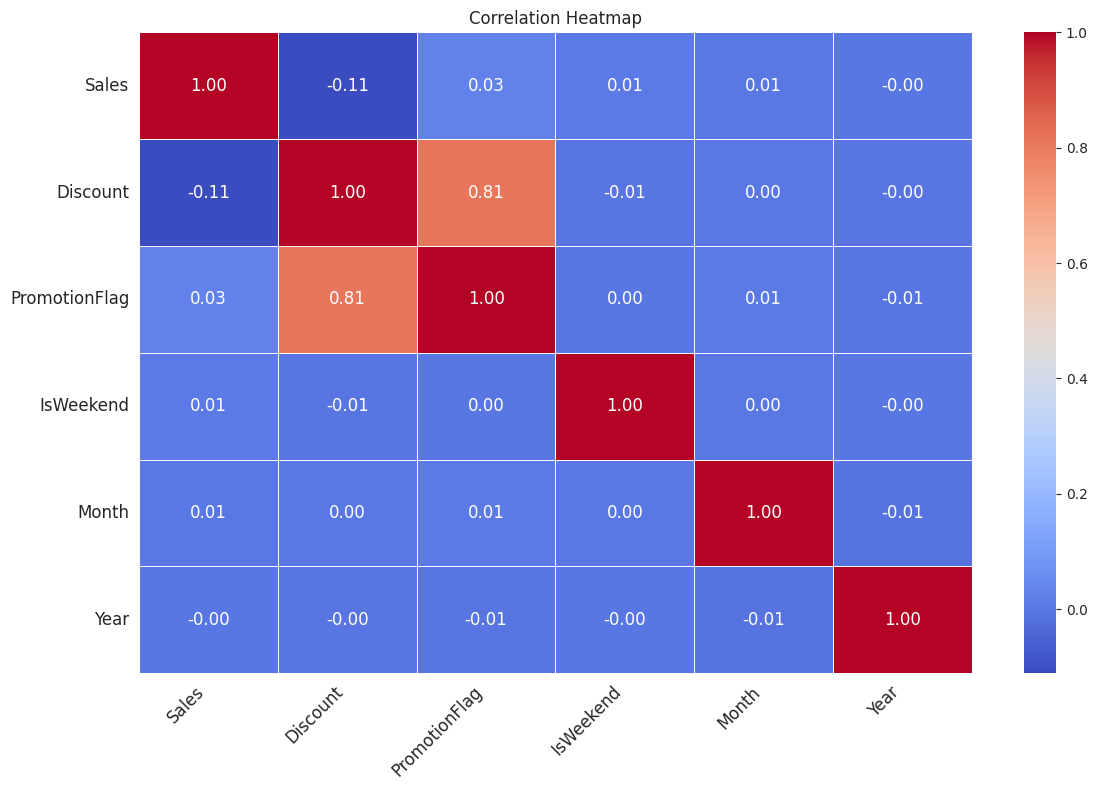

In [359]:
correlation_cols = ["Sales", "Discount", "PromotionFlag", "IsWeekend", "Month", "Year"]
df_corr = data[correlation_cols]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')

plt.show()

In [360]:
correlation_matrix

Sales  Discount  PromotionFlag  IsWeekend     Month  \
Sales          1.000000 -0.110905       0.029002   0.008458  0.005227   
Discount      -0.110905  1.000000       0.812491  -0.005803  0.002938   
PromotionFlag  0.029002  0.812491       1.000000   0.000222  0.007966   
IsWeekend      0.008458 -0.005803       0.000222   1.000000  0.002029   
Month          0.005227  0.002938       0.007966   0.002029  1.000000   
Year          -0.002172 -0.003103      -0.005762  -0.001913 -0.011016   

                   Year  
Sales         -0.002172  
Discount      -0.003103  
PromotionFlag -0.005762  
IsWeekend     -0.001913  
Month         -0.011016  
Year           1.000000

<h3 style="color:#70C1B3; font-weight:bold">Feature Engineering</h3>


<h3 style="color:#70C1B3; font-weight:bold">Data Visualization</h3>


In [361]:
fig1 = px.histogram(data,
                    x='Sales',
                    nbins=50,
                    title='Distribution of Sales',
                    marginal='box',
                    color_discrete_sequence=['blue'])

fig1.update_layout(xaxis_title='Sales', yaxis_title='Frequency')
fig1.show()

fig2 = px.histogram(data,
                    x='Profit',
                    nbins=50,
                    title='Distribution of Profit',
                    marginal='violin',
                    color_discrete_sequence=['green'])

fig2.update_layout(xaxis_title='Profit', yaxis_title='Frequency')
fig2.show()

In [362]:
fig = px.scatter(data,
                 x='Discount',
                 y='Sales',
                 opacity=0.6,
                 color='Discount',
                 title='Sales vs. Discount')

fig.update_layout(xaxis_title='Discount', yaxis_title='Sales')
fig.show()

In [363]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Sales Count']

fig = px.bar(category_counts,
             x='Category',
             y='Sales Count',
             color='Sales Count',
             title='Sales Count by Product Category')

fig.update_layout(xaxis_title="Category",
                  yaxis_title="Number of Sales",
                  xaxis_tickangle=-45)

fig.show()

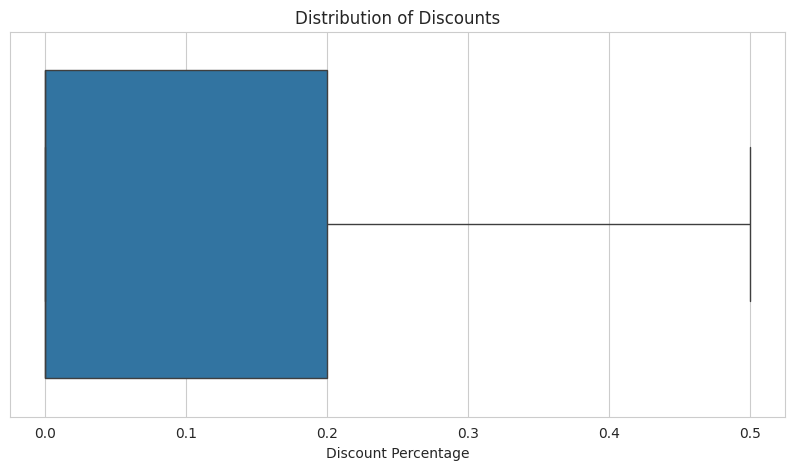

In [364]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Discount'])
plt.title("Distribution of Discounts")
plt.xlabel("Discount Percentage")
plt.show()

In [365]:
def filter_data(region=None, year=None, promotion_flag=None):
    filtered_df = data.copy()

    if region is not None:
        filtered_df = filtered_df[filtered_df['Region'] == region]

    if year is not None:
        filtered_df = filtered_df[filtered_df['Year'] == year]

    if promotion_flag is not None:
        filtered_df = filtered_df[filtered_df['PromotionFlag'] == promotion_flag]

    return filtered_df

def plot_sales_over_time(region=None, year=None, promotion_flag=None):
    filtered_df = filter_data(region, year, promotion_flag)

    filtered_df = filtered_df.sort_values(by='Order Date')

    sales_trend = filtered_df.groupby('Order Date')['Sales'].sum().reset_index()

    if sales_trend.empty:
        print("No data available for the selected filters!")
        return

    fig = px.line(sales_trend, x='Order Date', y='Sales', title='Sales Over Time')
    fig.update_xaxes(title_text='Order Date', tickformat='%Y-%m-%d')
    fig.update_yaxes(title_text='Sales')
    fig.show()

plot_sales_over_time()

In [366]:
def plot_sales_over_time(region=None, year=None, promotion=None):
    filtered_df = filter_data(region, year, promotion)

    filtered_df = filtered_df.sort_values(by='Order Date')

    sales_trend = filtered_df.groupby('Order Date')['Sales'].sum().reset_index()

    if sales_trend.empty:
        print("No data available for the selected filters!")
        return

    fig = px.line(sales_trend, x='Order Date', y='Sales', title='Sales Over Time')
    fig.update_xaxes(title_text='Order Date', tickformat='%Y-%m-%d')
    fig.update_yaxes(title_text='Sales')
    fig.show()

plot_sales_over_time()

In [367]:
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

def plot_profit_by_region():
    region_profit = data.groupby('Region')['Profit'].sum().reset_index()

    fig = px.choropleth(region_profit,
                        locations='Region',
                        locationmode='ISO-3',
                        color='Profit',
                        title='Total Profit by Region',
                        color_continuous_scale='Blues')

    fig.update_layout(geo=dict(showcoastlines=True))
    fig.show()

plot_profit_by_region()

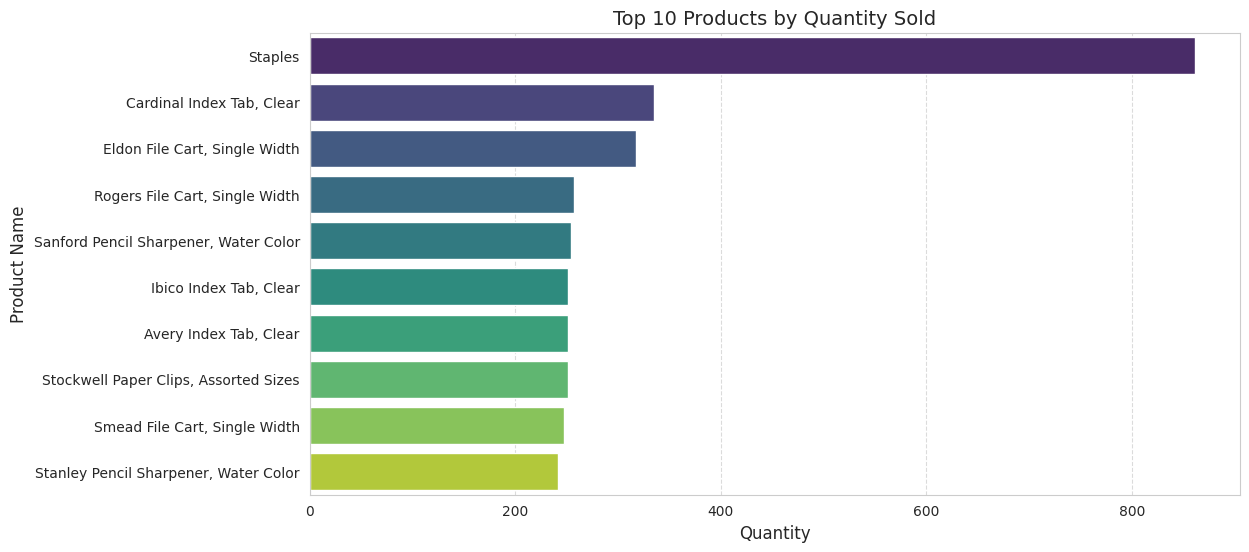

In [368]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

def plot_quantity_by_product(top_n=10):
    product_quantity = data.groupby('Product Name')['Quantity'].sum().reset_index()

    product_quantity = product_quantity.sort_values(by='Quantity', ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=product_quantity, x='Quantity', y='Product Name', palette='viridis')

    plt.title(f'Top {top_n} Products by Quantity Sold', fontsize=14)
    plt.xlabel('Quantity', fontsize=12)
    plt.ylabel('Product Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_quantity_by_product(10)

<h3 style="color:#70C1B3; font-weight:bold">Data encoding and normalization</h3>

In [369]:
# data['Order Date'] = pd.to_datetime(data['Order Date'])

# groupedData = data.groupby(['Order Date','Segment',
#                              'Country', 'Sub-Category',
#                                'PromotionFlag']).agg({
#                                     'Sales': 'sum'
#                                }).reset_index()

# groupedData

In [370]:
#filtered = groupedData[(groupedData['Sales'] != 0)]
filtered = pd.read_csv('Grouped.csv')
filtered.drop(['Unnamed: 0'],inplace=True, axis=1)
filtered

Order Date      Segment              Country   Product ID  \
0      2012-01-01     Consumer              Algeria  OFF-ST-6261   
1      2012-01-01     Consumer            Australia  FUR-FU-4075   
2      2012-01-01     Consumer            Australia  OFF-PA-3990   
3      2012-01-01     Consumer            Australia  OFF-SU-3002   
4      2012-01-01     Consumer              Hungary  OFF-ST-6230   
...           ...          ...                  ...          ...   
51221  2015-12-31  Home Office            Nicaragua  OFF-ST-6024   
51222  2015-12-31  Home Office                Spain  TEC-CO-4568   
51223  2015-12-31  Home Office             Tanzania  OFF-LA-4542   
51224  2015-12-31  Home Office  Trinidad and Tobago  OFF-AP-3858   
51225  2015-12-31  Home Office        United States  OFF-AP-4222   

       PromotionFlag    Sales  
0                  0  408.300  
1                  1  113.670  
2                  1   55.242  
3                  1  120.366  
4                  0   66.120  
...              ...      ...  
51221              0   15.000  
51222              0  530.220  
51223              0   49.500  
51224              0  135.480  
51225              0  209.300  

[51226 rows x 6 columns]

In [371]:
prod_info = data[['Product ID', 'Sub-Category', 'Category']].drop_duplicates()

In [372]:
merged = filtered.merge(prod_info , on='Product ID',how='left')

merged

Order Date      Segment              Country   Product ID  \
0      2012-01-01     Consumer              Algeria  OFF-ST-6261   
1      2012-01-01     Consumer            Australia  FUR-FU-4075   
2      2012-01-01     Consumer            Australia  OFF-PA-3990   
3      2012-01-01     Consumer            Australia  OFF-SU-3002   
4      2012-01-01     Consumer              Hungary  OFF-ST-6230   
...           ...          ...                  ...          ...   
51221  2015-12-31  Home Office            Nicaragua  OFF-ST-6024   
51222  2015-12-31  Home Office                Spain  TEC-CO-4568   
51223  2015-12-31  Home Office             Tanzania  OFF-LA-4542   
51224  2015-12-31  Home Office  Trinidad and Tobago  OFF-AP-3858   
51225  2015-12-31  Home Office        United States  OFF-AP-4222   

       PromotionFlag    Sales Sub-Category         Category  
0                  0  408.300      Storage  Office Supplies  
1                  1  113.670  Furnishings        Furniture  
2                  1   55.242        Paper  Office Supplies  
3                  1  120.366     Supplies  Office Supplies  
4                  0   66.120      Storage  Office Supplies  
...              ...      ...          ...              ...  
51221              0   15.000      Storage  Office Supplies  
51222              0  530.220      Copiers       Technology  
51223              0   49.500       Labels  Office Supplies  
51224              0  135.480   Appliances  Office Supplies  
51225              0  209.300   Appliances  Office Supplies  

[51226 rows x 8 columns]

In [373]:
merged['Order Date'] = pd.to_datetime(merged['Order Date'])

merged['Year'] = merged['Order Date'].dt.year
merged['Month'] = merged['Order Date'].dt.month
merged['Weekday'] = merged['Order Date'].dt.weekday
merged['IsWeekend'] = merged['Weekday'].isin([5, 6])

In [374]:
merged['Season'] = merged['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                           'Spring' if x in [3, 4, 5] else
                                           'Summer' if x in [6, 7, 8] else
                                           'Fall')

In [375]:
encoder = OneHotEncoder(sparse_output=False) # Use sparse_output instead of sparse

encoded = encoder.fit_transform(merged[['Segment', 'Sub-Category', 'Category', 'Season']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Segment', 'Sub-Category', 'Category', 'Season']))

data_encoded = pd.concat([merged[['Order Date', 'Year', 'Month', 'Weekday', 'IsWeekend', 'Sales','Country', 'PromotionFlag', 'Product ID']], encoded_df], axis=1)

data_encoded

Order Date  Year  Month  Weekday  IsWeekend    Sales  \
0     2012-01-01  2012      1        6       True  408.300   
1     2012-01-01  2012      1        6       True  113.670   
2     2012-01-01  2012      1        6       True   55.242   
3     2012-01-01  2012      1        6       True  120.366   
4     2012-01-01  2012      1        6       True   66.120   
...          ...   ...    ...      ...        ...      ...   
51221 2015-12-31  2015     12        3      False   15.000   
51222 2015-12-31  2015     12        3      False  530.220   
51223 2015-12-31  2015     12        3      False   49.500   
51224 2015-12-31  2015     12        3      False  135.480   
51225 2015-12-31  2015     12        3      False  209.300   

                   Country  PromotionFlag   Product ID  Segment_Consumer  ...  \
0                  Algeria              0  OFF-ST-6261               1.0  ...   
1                Australia              1  FUR-FU-4075               1.0  ...   
2                Australia              1  OFF-PA-3990               1.0  ...   
3                Australia              1  OFF-SU-3002               1.0  ...   
4                  Hungary              0  OFF-ST-6230               1.0  ...   
...                    ...            ...          ...               ...  ...   
51221            Nicaragua              0  OFF-ST-6024               0.0  ...   
51222                Spain              0  TEC-CO-4568               0.0  ...   
51223             Tanzania              0  OFF-LA-4542               0.0  ...   
51224  Trinidad and Tobago              0  OFF-AP-3858               0.0  ...   
51225        United States              0  OFF-AP-4222               0.0  ...   

       Sub-Category_Storage  Sub-Category_Supplies  Sub-Category_Tables  \
0                       1.0                    0.0                  0.0   
1                       0.0                    0.0                  0.0   
2                       0.0                    0.0                  0.0   
3                       0.0                    1.0                  0.0   
4                       1.0                    0.0                  0.0   
...                     ...                    ...                  ...   
51221                   1.0                    0.0                  0.0   
51222                   0.0                    0.0                  0.0   
51223                   0.0                    0.0                  0.0   
51224                   0.0                    0.0                  0.0   
51225                   0.0                    0.0                  0.0   

       Category_Furniture  Category_Office Supplies  Category_Technology  \
0                     0.0                       1.0                  0.0   
1                     1.0                       0.0                  0.0   
2                     0.0                       1.0                  0.0   
3                     0.0                       1.0                  0.0   
4                     0.0                       1.0                  0.0   
...                   ...                       ...                  ...   
51221                 0.0                       1.0                  0.0   
51222                 0.0                       0.0                  1.0   
51223                 0.0                       1.0                  0.0   
51224                 0.0                       1.0                  0.0   
51225                 0.0                       1.0                  0.0   

       Season_Fall  Season_Spring  Season_Summer  Season_Winter  
0              0.0            0.0            0.0            1.0  
1              0.0            0.0            0.0            1.0  
2              0.0            0.0            0.0            1.0  
3              0.0            0.0            0.0            1.0  
4              0.0            0.0            0.0            1.0  
...            ...            ...            ...            ...  
51221       

In [376]:
le = LabelEncoder()

data_encoded['Country'] = le.fit_transform(data_encoded['Country'])
data_encoded['Product ID'] = le.fit_transform(data_encoded['Product ID'])

data_encoded

Order Date  Year  Month  Weekday  IsWeekend    Sales  Country  \
0     2012-01-01  2012      1        6       True  408.300        2   
1     2012-01-01  2012      1        6       True  113.670        6   
2     2012-01-01  2012      1        6       True   55.242        6   
3     2012-01-01  2012      1        6       True  120.366        6   
4     2012-01-01  2012      1        6       True   66.120       65   
...          ...   ...    ...      ...        ...      ...      ...   
51221 2015-12-31  2015     12        3      False   15.000      105   
51222 2015-12-31  2015     12        3      False  530.220      134   
51223 2015-12-31  2015     12        3      False   49.500      144   
51224 2015-12-31  2015     12        3      False  135.480      148   
51225 2015-12-31  2015     12        3      False  209.300      156   

       PromotionFlag  Product ID  Segment_Consumer  ...  Sub-Category_Storage  \
0                  0        2732               1.0  ...                   1.0   
1                  1         513               1.0  ...                   0.0   
2                  1        2151               1.0  ...                   0.0   
3                  1        2801               1.0  ...                   0.0   
4                  0        2722               1.0  ...                   1.0   
...              ...         ...               ...  ...                   ...   
51221              0        2688               0.0  ...                   1.0   
51222              0        3230               0.0  ...                   0.0   
51223              0        2035               0.0  ...                   0.0   
51224              0         903               0.0  ...                   0.0   
51225              0         932               0.0  ...                   0.0   

       Sub-Category_Supplies  Sub-Category_Tables  Category_Furniture  \
0                        0.0                  0.0                 0.0   
1                        0.0                  0.0                 1.0   
2                        0.0                  0.0                 0.0   
3                        1.0                  0.0                 0.0   
4                        0.0                  0.0                 0.0   
...                      ...                  ...                 ...   
51221                    0.0                  0.0                 0.0   
51222                    0.0                  0.0                 0.0   
51223                    0.0                  0.0                 0.0   
51224                    0.0                  0.0                 0.0   
51225                    0.0                  0.0                 0.0   

       Category_Office Supplies  Category_Technology  Season_Fall  \
0                           1.0                  0.0          0.0   
1                           0.0                  0.0          0.0   
2                           1.0                  0.0          0.0   
3                           1.0                  0.0          0.0   
4                           1.0                  0.0          0.0   
...                         ...                  ...          ...   
51221                       1.0                  0.0          0.0   
51222                       0.0                  1.0          0.0   
51223                       1.0                  0.0          0.0   
51224                       1.0                  0.0          0.0   
51225                       1.0                  0.0          0.0   

       Season_Spring  Season_Summer  Season_Winter  
0                0.0            0.0            1.0  
1                0.0            0.0            1.0  
2                0.0            0.0            1.0  
3                0.0            0.0            1.0  
4                0.0            0.0            1.0  
...              ...            ...            ...  
51221            0.0            0.0            1.0  
51222            0.0            0.0            1.0

In [377]:
data_encoded.columns

Index(['Order Date', 'Year', 'Month', 'Weekday', 'IsWeekend', 'Sales',
       'Country', 'PromotionFlag', 'Product ID', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Sub-Category_Accessories',
       'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers',
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Category_Furniture', 'Category_Office Supplies', 'Category_Technology',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

<h3 style="color:#70C1B3; font-weight:bold">Models</h3>

In [378]:
data_encoded = data_encoded.sort_values('Order Date')

In [379]:
df = data.groupby(['Order Date']).agg({
                            'Sales': 'sum'
                            }).reset_index()
df.head()

Order Date        Sales
0 2012-01-01   808.563000
1 2012-01-02   314.220000
2 2012-01-03  3814.236388
3 2012-01-04  1741.925303
4 2012-01-05  1215.005062

In [380]:
results = []

In [381]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [382]:
df = df.sort_values("Order Date")
df["ds"] = df["Order Date"]
df["y"] = df["Sales"].astype(float)
df.head()

Order Date        Sales         ds            y
0 2012-01-01   808.563000 2012-01-01   808.563000
1 2012-01-02   314.220000 2012-01-02   314.220000
2 2012-01-03  3814.236388 2012-01-03  3814.236388
3 2012-01-04  1741.925303 2012-01-04  1741.925303
4 2012-01-05  1215.005062 2012-01-05  1215.005062

In [383]:
y_series = df.set_index("ds")["y"]
arima_model = auto_arima(y_series, seasonal=False, stepwise=True, suppress_warnings=True)
arima_pred = arima_model.predict_in_sample()
arima_r2 = r2_score(y_series, arima_pred)
results.append(("ARIMA_date_only", {
    "RMSE": np.sqrt(mean_squared_error(y_series, arima_pred)),
    "MAE": mean_absolute_error(y_series, arima_pred),
    "R2": arima_r2
}))

'y_series = df.set_index("ds")["y"]\narima_model = auto_arima(y_series, seasonal=False, stepwise=True, suppress_warnings=True)\narima_pred = arima_model.predict_in_sample()\narima_r2 = r2_score(y_series, arima_pred)\nresults.append(("ARIMA_date_only", {\n    "RMSE": np.sqrt(mean_squared_error(y_series, arima_pred)),\n    "MAE": mean_absolute_error(y_series, arima_pred),\n    "R2": arima_r2\n}))'

In [384]:
ets_model = ExponentialSmoothing(y_series, trend="add", seasonal=None)
ets_fit = ets_model.fit()
ets_pred = ets_fit.fittedvalues
ets_r2 = r2_score(y_series, ets_pred)
results.append(("ETS_date_only", {
    "RMSE": np.sqrt(mean_squared_error(y_series, ets_pred)),
    "MAE": mean_absolute_error(y_series, ets_pred),
    "R2": ets_r2
}))

In [385]:
df_prophet = df[["ds", "y"]].copy()
prophet_model = Prophet()
prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=0)
forecast = prophet_model.predict(future)
prophet_r2 = r2_score(df_prophet["y"], forecast["yhat"])
results.append(("Prophet_date_only", {
    "RMSE": np.sqrt(mean_squared_error(df_prophet["y"], forecast["yhat"])),
    "MAE": mean_absolute_error(df_prophet["y"], forecast["yhat"]),
    "R2": prophet_r2
}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ktkadtb/tq_6c4cq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ktkadtb/g3ia9cx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5803', 'data', 'file=/tmp/tmp1ktkadtb/tq_6c4cq.json', 'init=/tmp/tmp1ktkadtb/g3ia9cx1.json', 'output', 'file=/tmp/tmp1ktkadtb/prophet_modelbljy11po/prophet_model-20250502224341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:43:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:43:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [386]:
X_all = data_encoded.drop(columns=["Sales", "Order Date"])
y_all = data_encoded["Sales"]

In [387]:
tscv = TimeSeriesSplit(n_splits=3)
rf = RandomForestRegressor()
gs_rf = GridSearchCV(rf, {
    "n_estimators": [50, 100],
    "max_depth": [5, 10]
}, cv=tscv)
gs_rf.fit(X_all, y_all)
y_rf_pred = gs_rf.predict(X_all)
rf_r2 = r2_score(y_all, y_rf_pred)
results.append(("RandomForest_all_features", {
    "RMSE": np.sqrt(mean_squared_error(y_all, y_rf_pred)),
    "MAE": mean_absolute_error(y_all, y_rf_pred),
    "R2": rf_r2
}))

In [388]:
gb = GradientBoostingRegressor()
gs_gb = GridSearchCV(gb, {
    "n_estimators": [50, 100],
    "learning_rate": [0.05, 0.1]
}, cv=tscv)
gs_gb.fit(X_all, y_all)
y_gb_pred = gs_gb.predict(X_all)
gb_r2 = r2_score(y_all, y_gb_pred)
results.append(("GradientBoosting_all_features", {
    "RMSE": np.sqrt(mean_squared_error(y_all, y_gb_pred)),
    "MAE": mean_absolute_error(y_all, y_gb_pred),
    "R2": gb_r2
}))

In [389]:

X_seq = []
y_seq = []
window = 10
for i in range(len(X_all) - window):
    X_seq.append(X_all[i:i+window])
    y_seq.append(y_all.values[i+window])

X_seq = np.array(X_seq).astype(np.float32)
y_seq = np.array(y_seq).astype(np.float32)
if y_seq.ndim > 1 and y_seq.shape[1] == 1:
    y_seq = y_seq.flatten()
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_seq, y_seq, epochs=10, batch_size=32, verbose=1, callbacks=[EarlyStopping(patience=3)])
y_lstm_pred = model_lstm.predict(X_seq)
lstm_r2 = r2_score(y_seq, y_lstm_pred.flatten())
results.append(("LSTM_all_features", {
    "RMSE": np.sqrt(mean_squared_error(y_seq, y_lstm_pred.flatten())),
    "MAE": mean_absolute_error(y_seq, y_lstm_pred.flatten()),
    "R2": lstm_r2
}))


Epoch 1/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 38768.5781
Epoch 2/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36404.6250
Epoch 3/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36556.0156
Epoch 4/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 36542.1758
Epoch 5/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 36395.1680
Epoch 6/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 36467.7422
Epoch 7/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 35670.5430
Epoch 8/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36497.3125
Epoch 9/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 36228.5352
Epoch 10/10
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36136.6484
1601/1601 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [390]:
results_df = pd.DataFrame(results, columns=["Model", "Metrics"])
results_df[["RMSE", "MAE", "R2"]] = results_df["Metrics"].apply(pd.Series)
results_df.drop(columns=["Metrics"], inplace=True)
print("\nModel Comparison Results:\n")
print(results_df.sort_values("RMSE"))


Model Comparison Results:

                           Model         RMSE          MAE        R2
2      RandomForest_all_features   117.511779    84.193142  0.619823
3  GradientBoosting_all_features   133.523291    97.373962  0.509164
4              LSTM_all_features   190.265830   156.403290  0.003369
1              Prophet_date_only  2474.409345  1939.382922  0.666037
0                  ETS_date_only  3707.746497  2889.192330  0.250148


In [391]:
improved_results = []

In [392]:
from sklearn.model_selection import RandomizedSearchCV
tscv = TimeSeriesSplit(n_splits=3)

In [393]:
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}
rs_rf = RandomizedSearchCV(
    rf, rf_param_grid, n_iter=20, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42
)
rs_rf.fit(X_all, y_all)
y_rf_pred = rs_rf.predict(X_all)
rf_r2 = r2_score(y_all, y_rf_pred)
improved_results.append(("RandomForest_all_features", {
    "RMSE": np.sqrt(mean_squared_error(y_all, y_rf_pred)),
    "MAE": mean_absolute_error(y_all, y_rf_pred),
    "R2": rf_r2
}))

In [394]:
gb = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "subsample": [0.8, 1.0]
}
rs_gb = RandomizedSearchCV(
    gb, gb_param_grid, n_iter=20, cv=tscv, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42
)
rs_gb.fit(X_all, y_all)
y_gb_pred = rs_gb.predict(X_all)
gb_r2 = r2_score(y_all, y_gb_pred)
improved_results.append(("GradientBoosting_all_features", {
    "RMSE": np.sqrt(mean_squared_error(y_all, y_gb_pred)),
    "MAE": mean_absolute_error(y_all, y_gb_pred),
    "R2": gb_r2
}))

In [395]:
improved_results_df = pd.DataFrame(improved_results, columns=["Model", "Metrics"])
improved_results_df[["RMSE", "MAE", "R2"]] = improved_results_df["Metrics"].apply(pd.Series)
improved_results_df.drop(columns=["Metrics"], inplace=True)
print("\nModel Comparison After Improving Results:\n")
print(improved_results_df.sort_values("RMSE"))


Model Comparison After Improving Results:

                           Model        RMSE        MAE        R2
1  GradientBoosting_all_features  104.179271  75.156090  0.701197
0      RandomForest_all_features  110.711173  80.227146  0.662553


# prophet


In [396]:
df.head()
# df = pd.read_csv('data_encoded.csv')
# df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

Order Date        Sales         ds            y
0 2012-01-01   808.563000 2012-01-01   808.563000
1 2012-01-02   314.220000 2012-01-02   314.220000
2 2012-01-03  3814.236388 2012-01-03  3814.236388
3 2012-01-04  1741.925303 2012-01-04  1741.925303
4 2012-01-05  1215.005062 2012-01-05  1215.005062

In [397]:
monthly_sales = df.groupby(df['ds'].dt.to_period("M"))['Sales'].sum().reset_index()
monthly_sales['ds'] = monthly_sales['ds'].dt.to_timestamp()
monthly_sales.rename(columns={'Sales': 'y'}, inplace=True)

In [398]:
train = monthly_sales[:-12]
test = monthly_sales[-12:]

In [399]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ktkadtb/bux2mm3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ktkadtb/lwl0o0as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74396', 'data', 'file=/tmp/tmp1ktkadtb/bux2mm3v.json', 'init=/tmp/tmp1ktkadtb/lwl0o0as.json', 'output', 'file=/tmp/tmp1ktkadtb/prophet_modelh1wfwbvk/prophet_model-20250502225944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:59:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [400]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

In [401]:
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.date
test['ds'] = pd.to_datetime(test['ds']).dt.date

In [402]:
y_pred = forecast[['ds', 'yhat']].tail(12)['yhat'].values
y_test = test['y'].values

In [403]:
print(len(y_test), len(y_pred))


12 12


In [404]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [405]:
print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 Score: 0.8103859130121043
MAE: 28828.362938151127
MSE: 1306098689.977664
